# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

Мы научимся обрабатывать пропуски в данных для количественных (числовых) и категориальных признаков и масштабировать данные. Также мы научимся преобразовывать категориальные признаки в числовые.

### В чем состоит проблема?

- Если в данных есть пропуски, то большинство алгоритмов машинного обучения не будут с ними работать. Даже корреляционная матрица не будет строиться корректно.
- Большинство алгоритмов машинного обучения требуют явного перекодирования категориальных признаков в числовые. Даже если алгоритм не требует этого явно, такое перекодирование возможно стоит попробовать, чтобы повысить качество модели.
- Большинство алгоритмов показывает лучшее качество на масштабированных признаках, в особенности алгоритмы, использующие методы градиентного спуска.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных




In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('car_prices.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(558837, 16)

In [4]:
# типы колонок
data.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 558837


# Обработка пропусков в данных

## Простые стратегии - удаление или заполнение нулями

Удаление колонок, содержащих пустые значения
`res = data.dropna(axis=1, how='any')`

Удаление строк, содержащих пустые значения
`res = data.dropna(axis=0, how='any')`

[Документация](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

**Удаление может производиться для группы строк или колонок.**

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((558837, 16), (558837, 3))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((558837, 16), (472325, 16))

In [10]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## "Внедрение значений" - импьютация (imputation)

### Обработка пропусков в числовых данных

In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка condition. Тип данных float64. Количество пустых значений 11820, 2.12%.
Колонка odometer. Тип данных float64. Количество пустых значений 94, 0.02%.
Колонка mmr. Тип данных float64. Количество пустых значений 38, 0.01%.
Колонка sellingprice. Тип данных float64. Количество пустых значений 12, 0.0%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,condition,odometer,mmr,sellingprice
0,5.0,16639.0,20500.0,21500.0
1,5.0,9393.0,20800.0,21500.0
2,45.0,1331.0,31900.0,30000.0
3,41.0,14282.0,27500.0,27750.0
4,43.0,2641.0,66000.0,67000.0
...,...,...,...,...
558832,45.0,18255.0,35300.0,33000.0
558833,5.0,54393.0,30200.0,30800.0
558834,48.0,50561.0,29800.0,34000.0
558835,38.0,16658.0,15100.0,11100.0


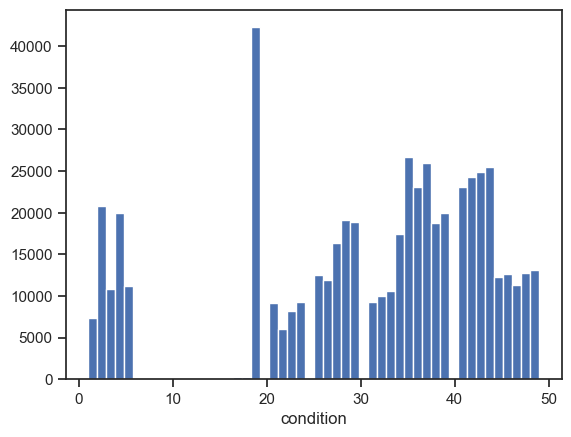

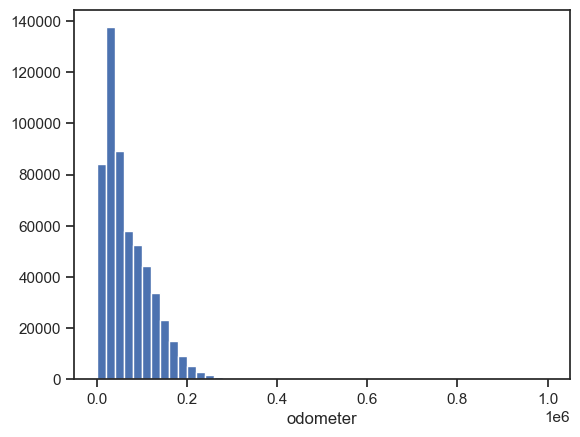

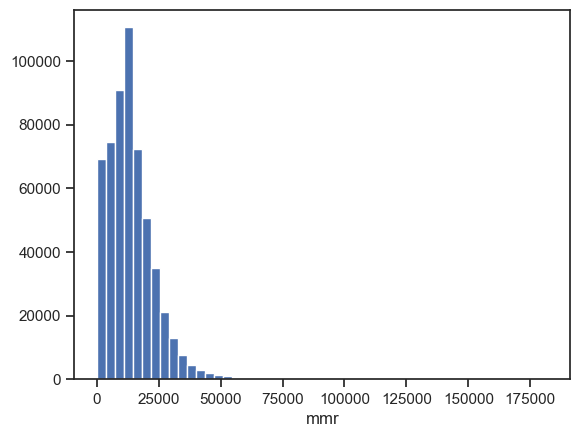

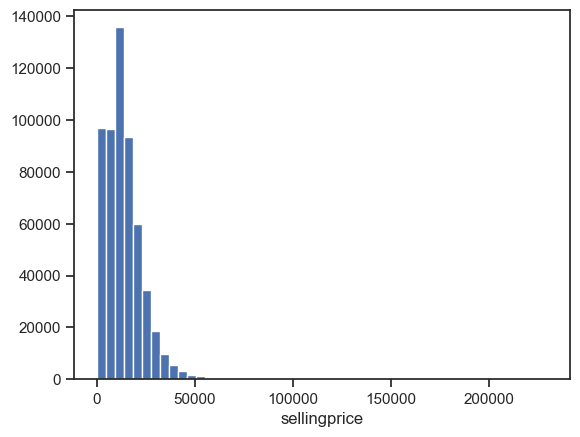

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Будем использовать встроенные средства импьютации библиотеки scikit-learn - https://scikit-learn.org/stable/modules/impute.html

In [15]:
data_num_condition = data_num[['condition']]
data_num_condition.head()

,condition
0,5.0
1,5.0
2,45.0
3,41.0
4,43.0


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_condition)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

С помощью класса [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) можно проводить импьютацию различными [показателями центра распределения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F)

In [18]:
strategies=['mean', 'median', 'most_frequent']

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_condition)
    return data_num_imp[mask_missing_values_only]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([30.67236484, 30.67236484, 30.67236484, ..., 30.67236484,
        30.67236484, 30.67236484]))

In [21]:
strategies[1], test_num_impute(strategies[1])

('median', array([35., 35., 35., ..., 35., 35., 35.]))

In [22]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([19., 19., 19., ..., 19., 19., 19.]))

In [23]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [24]:
data[['odometer']].describe()

,odometer
count,558743.000000
mean,68320.017767
std,53398.542821
min,1.000000
25%,28371.000000
50%,52254.000000
75%,99109.000000
max,999999.000000


In [25]:
test_num_impute_col(data, 'odometer', strategies[0])

('odometer', 'mean', 94, 68320.01776666554, 68320.01776666554)

In [26]:
test_num_impute_col(data, 'odometer', strategies[1])

('odometer', 'median', 94, 52254.0, 52254.0)

In [27]:
test_num_impute_col(data, 'odometer', strategies[2])

('odometer', 'most_frequent', 94, 1.0, 1.0)

### Обработка пропусков в категориальных данных

In [28]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка make. Тип данных object. Количество пустых значений 10301, 1.84%.
Колонка model. Тип данных object. Количество пустых значений 10399, 1.86%.
Колонка trim. Тип данных object. Количество пустых значений 10651, 1.91%.
Колонка body. Тип данных object. Количество пустых значений 13195, 2.36%.
Колонка transmission. Тип данных object. Количество пустых значений 65352, 11.69%.
Колонка vin. Тип данных object. Количество пустых значений 4, 0.0%.
Колонка color. Тип данных object. Количество пустых значений 749, 0.13%.
Колонка interior. Тип данных object. Количество пустых значений 749, 0.13%.
Колонка saledate. Тип данных object. Количество пустых значений 12, 0.0%.


**Какие из этих колонок Вы бы выбрали или не выбрали для построения модели?**

Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".

In [29]:
cat_temp_data = data[['body']]
cat_temp_data.head()

,body
0,SUV
1,SUV
2,Sedan
3,Sedan
4,Sedan


In [30]:
cat_temp_data['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

In [31]:
cat_temp_data[cat_temp_data['body'].isnull()].shape

(13195, 1)

In [32]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['SUV'],
       ['SUV'],
       ['Sedan'],
       ...,
       ['SUV'],
       ['sedan'],
       ['SuperCrew']], dtype=object)

In [33]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Access Cab', 'Beetle Convertible', 'CTS Coupe', 'CTS Wagon',
       'CTS-V Coupe', 'CTS-V Wagon', 'Cab Plus', 'Cab Plus 4', 'Club Cab',
       'Convertible', 'Coupe', 'Crew Cab', 'CrewMax Cab', 'Double Cab',
       'E-Series Van', 'Elantra Coupe', 'Extended Cab', 'G Convertible',
       'G Coupe', 'G Sedan', 'G37 Convertible', 'G37 Coupe',
       'Genesis Coupe', 'GranTurismo Convertible', 'Hatchback',
       'King Cab', 'Koup', 'Mega Cab', 'Minivan', 'Navitgation',
       'Promaster Cargo Van', 'Q60 Convertible', 'Q60 Coupe', 'Quad Cab',
       'Ram Van', 'Regular Cab', 'SUV', 'Sedan', 'SuperCab', 'SuperCrew',
       'TSX Sport Wagon', 'Transit Van', 'Van', 'Wagon', 'Xtracab',
       'access cab', 'beetle convertible', 'cab plus 4', 'club cab',
       'convertible', 'coupe', 'crew cab', 'crewmax cab', 'cts coupe',
       'cts wagon', 'cts-v coupe', 'double cab', 'e-series van',
       'elantra coupe', 'extended cab', 'g convertible', 'g coupe',
       'g sedan', 'g37 convertib

In [34]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['SUV'],
       ['SUV'],
       ['Sedan'],
       ...,
       ['SUV'],
       ['sedan'],
       ['SuperCrew']], dtype=object)

In [35]:
np.unique(data_imp3)

array(['Access Cab', 'Beetle Convertible', 'CTS Coupe', 'CTS Wagon',
       'CTS-V Coupe', 'CTS-V Wagon', 'Cab Plus', 'Cab Plus 4', 'Club Cab',
       'Convertible', 'Coupe', 'Crew Cab', 'CrewMax Cab', 'Double Cab',
       'E-Series Van', 'Elantra Coupe', 'Extended Cab', 'G Convertible',
       'G Coupe', 'G Sedan', 'G37 Convertible', 'G37 Coupe',
       'Genesis Coupe', 'GranTurismo Convertible', 'Hatchback',
       'King Cab', 'Koup', 'Mega Cab', 'Minivan', 'NA', 'Navitgation',
       'Promaster Cargo Van', 'Q60 Convertible', 'Q60 Coupe', 'Quad Cab',
       'Ram Van', 'Regular Cab', 'SUV', 'Sedan', 'SuperCab', 'SuperCrew',
       'TSX Sport Wagon', 'Transit Van', 'Van', 'Wagon', 'Xtracab',
       'access cab', 'beetle convertible', 'cab plus 4', 'club cab',
       'convertible', 'coupe', 'crew cab', 'crewmax cab', 'cts coupe',
       'cts wagon', 'cts-v coupe', 'double cab', 'e-series van',
       'elantra coupe', 'extended cab', 'g convertible', 'g coupe',
       'g sedan', 'g37 con

In [36]:
data_imp3[data_imp3=='NA'].size

13195

# Преобразование категориальных признаков в числовые

In [37]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,SUV
1,SUV
2,Sedan
3,Sedan
4,Sedan
...,...
558832,Sedan
558833,Crew Cab
558834,SUV
558835,sedan


## Кодирование категорий целочисленными значениями (label encoding)

В этом случае уникальные значения категориального признака кодируются целыми числами.

В scikit-learn для такого кодирования используется два класса :

- [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) - который ориентирован на применение к одному признаку. Этот класс прежде всего предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков.
- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) - который ориентирован на применение к матрице объект-признак, то есть для кодирования матрицы нецелевых признаков.

### Использование LabelEncoder

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
cat_enc['c1'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'extended c

In [40]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [41]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['Access Cab', 'Beetle Convertible', 'CTS Coupe', 'CTS Wagon',
       'CTS-V Coupe', 'CTS-V Wagon', 'Cab Plus', 'Cab Plus 4', 'Club Cab',
       'Convertible', 'Coupe', 'Crew Cab', 'CrewMax Cab', 'Double Cab',
       'E-Series Van', 'Elantra Coupe', 'Extended Cab', 'G Convertible',
       'G Coupe', 'G Sedan', 'G37 Convertible', 'G37 Coupe',
       'Genesis Coupe', 'GranTurismo Convertible', 'Hatchback',
       'King Cab', 'Koup', 'Mega Cab', 'Minivan', 'Navitgation',
       'Promaster Cargo Van', 'Q60 Convertible', 'Q60 Coupe', 'Quad Cab',
       'Ram Van', 'Regular Cab', 'SUV', 'Sedan', 'SuperCab', 'SuperCrew',
       'TSX Sport Wagon', 'Transit Van', 'Van', 'Wagon', 'Xtracab',
       'access cab', 'beetle convertible', 'cab plus 4', 'club cab',
       'convertible', 'coupe', 'crew cab', 'crewmax cab', 'cts coupe',
       'cts wagon', 'cts-v coupe', 'double cab', 'e-series van',
       'elantra coupe', 'extended cab', 'g convertible', 'g coupe',
       'g sedan', 'g37 convertib

In [42]:
cat_enc_le

array([36, 36, 37, ..., 36, 78, 39])

In [43]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86])

In [44]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2, 3])

array(['Access Cab', 'Beetle Convertible', 'CTS Coupe', 'CTS Wagon'],
      dtype=object)

### Использование OrdinalEncoder

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
data_oe = data[['make', 'body', 'color']]
data_oe.head()

,make,body,color
0,Kia,SUV,white
1,Kia,SUV,white
2,BMW,Sedan,gray
3,Volvo,Sedan,white
4,BMW,Sedan,gray


In [47]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['Kia', 'SUV', 'white'],
       ['Kia', 'SUV', 'white'],
       ['BMW', 'Sedan', 'gray'],
       ...,
       ['BMW', 'SUV', 'black'],
       ['Nissan', 'sedan', 'white'],
       ['Ford', 'SuperCrew', 'gray']], dtype=object)

In [48]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[24., 37., 44.],
       [24., 37., 44.],
       [ 3., 38., 34.],
       ...,
       [ 3., 37., 28.],
       [37., 79., 44.],
       [14., 40., 34.]])

In [49]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96.])

In [50]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87.])

In [51]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46.])

In [52]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick',
        'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT',
        'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda',
        'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia',
        'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI',
        'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi',
        'NA', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche',
        'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru',
        'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'acura',
        'airstream', 'audi', 'bmw', 'buick', 'cadillac', 'chev truck',
        'chevrolet', 'chrysler', 'dodge', 'dodge tk', 'dot', 'ford',
        'ford tk', 'ford truck', 'gmc', 'gmc truck', 'honda', 'hyundai',
        'hyundai tk', 'jeep', 'kia', 'land rover', 'landrover', 'lexus',
        'lincoln', 'maserati', 'mazda', 'mazda tk', 'mercedes',
        'mercedes-b', 

In [53]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['Kia', 'SUV', 'white'],
       ['Kia', 'SUV', 'white'],
       ['BMW', 'Sedan', 'gray'],
       ...,
       ['BMW', 'SUV', 'black'],
       ['Nissan', 'sedan', 'white'],
       ['Ford', 'SuperCrew', 'gray']], dtype=object)

### Проблемы использования LabelEncoder и OrdinalEncoder

Необходимо отметить, что LabelEncoder и OrdinalEncoder могут использоваться только для категориальных признаков в номинальных шкалах (для которых отсутствует порядок), например города, страны, названия рек и т.д. 

Это связано с тем, что задать какой-либо порядок при кодировании с помощью LabelEncoder и OrdinalEncoder невозможно, они сортируют категории в лексикографическом порядке.

При этом кодирование целыми числами создает фиктивное отношение порядка (1 < 2 < 3 < ...) которого не было в исходных номинальных шкалах. Данное отношение порядка может негативно повлиять на построение модели машинного обучения.

### Кодирование шкал порядка

Библиотека scikit-learn не предоставляет готового решения для кодирования шкал порядка, но можно воспользоваться [функцией map для отдельных объектов Series.](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

In [54]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']

In [55]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [56]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [57]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


## Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

В этом случае каждое уникальное значение признака становится новым отдельным признаком.

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [60]:
cat_enc.shape

(558837, 1)

In [61]:
cat_enc_ohe.shape

(558837, 87)

In [62]:
cat_enc_ohe

<558837x87 sparse matrix of type '<class 'numpy.float64'>'
	with 558837 stored elements in Compressed Sparse Row format>

In [63]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,

In [64]:
cat_enc.head(10)

,c1
0,SUV
1,SUV
2,Sedan
3,Sedan
4,Sedan
5,Sedan
6,Sedan
7,Sedan
8,Sedan
9,Convertible


## [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) - быстрый вариант one-hot кодирования

In [65]:
pd.get_dummies(cat_enc).head()

,c1_Access Cab,c1_Beetle Convertible,c1_CTS Coupe,c1_CTS Wagon,c1_CTS-V Coupe,c1_CTS-V Wagon,c1_Cab Plus,c1_Cab Plus 4,c1_Club Cab,c1_Convertible,...,c1_regular-cab,c1_sedan,c1_supercab,c1_supercrew,c1_suv,c1_transit van,c1_tsx sport wagon,c1_van,c1_wagon,c1_xtracab
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,body_Access Cab,body_Beetle Convertible,body_CTS Coupe,body_CTS Wagon,body_CTS-V Coupe,body_CTS-V Wagon,body_Cab Plus,body_Cab Plus 4,body_Club Cab,body_Convertible,...,body_sedan,body_supercab,body_supercrew,body_suv,body_transit van,body_tsx sport wagon,body_van,body_wagon,body_xtracab,body_nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Масштабирование данных

Термины "масштабирование" и "нормализация" часто используются как синонимы, но это неверно. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины. В этом разделе рассматривается только масштабирование.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два подхода:
- MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

В этом случае значения лежат в диапазоне от 0 до 1.
- Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0):
$$ x_{новый} = \frac{x_{старый} - AVG(X) }{\sigma(X)} $$

В этом случае большинство значений попадает в диапазон от -3 до 3.

где $X$ - матрица объект-признак, $AVG(X)$ - среднее значение, $\sigma$ - среднеквадратичное отклонение.

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [68]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['sellingprice']])

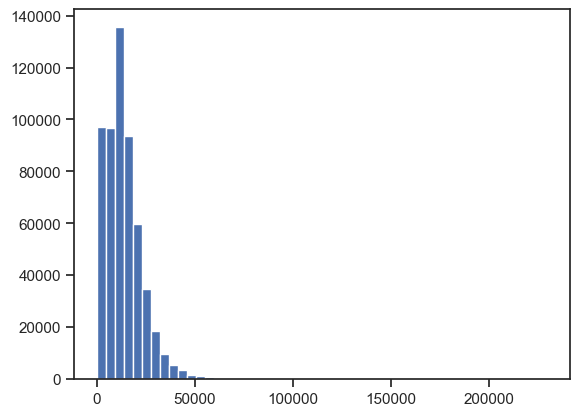

In [69]:
plt.hist(data['sellingprice'], 50)
plt.show()

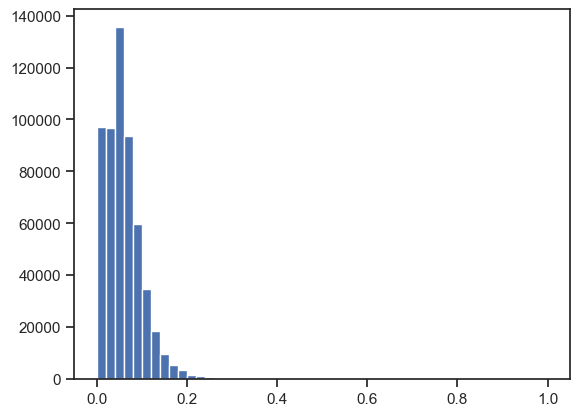

In [70]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [71]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['sellingprice']])

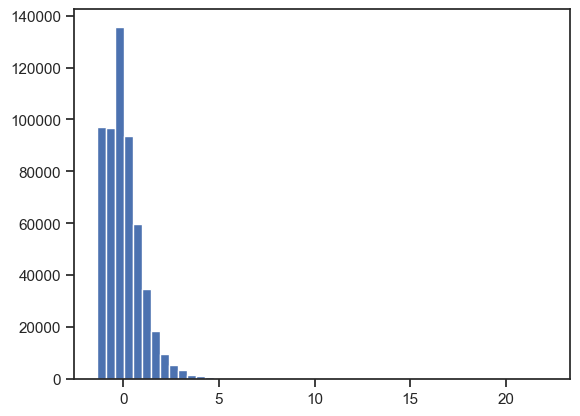

In [72]:
plt.hist(sc2_data, 50)
plt.show()